In [ ]:
##Word2Vec Predicts the word from the surrounding words.

!pip install matplotlib scikit-learn


In [97]:
# List of animals
animals = ['fox', 'dog', 'cat', 'rabbit', 'deer', 'lion', 'tiger', 'bear']

# Create variations
with open('sentence_variations.txt', 'w') as f:
    for animal1 in animals:
        for animal2 in animals:
            sentence = f"The quick brown {animal1} jumps over the lazy {animal2}\n"
            f.write(sentence)


In [138]:
# List of animals
animals = ['fox', 'dog', 'cat', 'rabbit', 'deer', 'lion', 'tiger', 'bear']

# Create variations
with open('sentence_variations2.txt', 'w') as f:
    for animal1 in animals:

        sentence = f"The quick brown {animal1} jumps over the lazy dog\n"
        f.write(sentence)


In [61]:
import string

def remove_punctuation(input_string):
    # Use a translation table to remove all punctuation
    translator = str.maketrans('', '', string.punctuation)
    return input_string.translate(translator)

import re

def remove_trailing_commas_dots(text):
    # This regex matches commas and dots that are directly followed by a whitespace
    # or are at the end of a string.
    return re.sub(r'([.,])(\s|$)', r'\2', text)


In [139]:


# Reading the entire content of 'text.txt' into the variable 'text'
with open('sentence_variations2.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print(text)
text = text.lower()
print(text)

text= remove_punctuation(text)
print(text)
text = text.split()
print(text)

# print(remove_trailing_commas_dots(text))

The quick brown fox jumps over the lazy dog
The quick brown dog jumps over the lazy dog
The quick brown cat jumps over the lazy dog
The quick brown rabbit jumps over the lazy dog
The quick brown deer jumps over the lazy dog
The quick brown lion jumps over the lazy dog
The quick brown tiger jumps over the lazy dog
The quick brown bear jumps over the lazy dog

the quick brown fox jumps over the lazy dog
the quick brown dog jumps over the lazy dog
the quick brown cat jumps over the lazy dog
the quick brown rabbit jumps over the lazy dog
the quick brown deer jumps over the lazy dog
the quick brown lion jumps over the lazy dog
the quick brown tiger jumps over the lazy dog
the quick brown bear jumps over the lazy dog

the quick brown fox jumps over the lazy dog
the quick brown dog jumps over the lazy dog
the quick brown cat jumps over the lazy dog
the quick brown rabbit jumps over the lazy dog
the quick brown deer jumps over the lazy dog
the quick brown lion jumps over the lazy dog
the quick

In [140]:
# Create a vocabulary
vocab = set(text)
vocab_size = len(vocab)
word_to_ix = {word: i for i, word in enumerate(vocab)}

print(vocab)
print(vocab_size)
print(word_to_ix)


{'over', 'lazy', 'jumps', 'bear', 'quick', 'fox', 'dog', 'the', 'tiger', 'cat', 'lion', 'rabbit', 'deer', 'brown'}
14
{'over': 0, 'lazy': 1, 'jumps': 2, 'bear': 3, 'quick': 4, 'fox': 5, 'dog': 6, 'the': 7, 'tiger': 8, 'cat': 9, 'lion': 10, 'rabbit': 11, 'deer': 12, 'brown': 13}


#CBOW Continious Bag of Words

In [141]:
data = []
context_size = 2
for i in range(context_size, len(text) - context_size):
    context = [text[i - j - 1] for j in range(context_size)] + [text[i + j + 1] for j in range(context_size)]
    target = text[i]
    data.append((context, target))

print(data)


[(['quick', 'the', 'fox', 'jumps'], 'brown'), (['brown', 'quick', 'jumps', 'over'], 'fox'), (['fox', 'brown', 'over', 'the'], 'jumps'), (['jumps', 'fox', 'the', 'lazy'], 'over'), (['over', 'jumps', 'lazy', 'dog'], 'the'), (['the', 'over', 'dog', 'the'], 'lazy'), (['lazy', 'the', 'the', 'quick'], 'dog'), (['dog', 'lazy', 'quick', 'brown'], 'the'), (['the', 'dog', 'brown', 'dog'], 'quick'), (['quick', 'the', 'dog', 'jumps'], 'brown'), (['brown', 'quick', 'jumps', 'over'], 'dog'), (['dog', 'brown', 'over', 'the'], 'jumps'), (['jumps', 'dog', 'the', 'lazy'], 'over'), (['over', 'jumps', 'lazy', 'dog'], 'the'), (['the', 'over', 'dog', 'the'], 'lazy'), (['lazy', 'the', 'the', 'quick'], 'dog'), (['dog', 'lazy', 'quick', 'brown'], 'the'), (['the', 'dog', 'brown', 'cat'], 'quick'), (['quick', 'the', 'cat', 'jumps'], 'brown'), (['brown', 'quick', 'jumps', 'over'], 'cat'), (['cat', 'brown', 'over', 'the'], 'jumps'), (['jumps', 'cat', 'the', 'lazy'], 'over'), (['over', 'jumps', 'lazy', 'dog'], 'the

In [167]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the model
class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view((1, -1))
        out = torch.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = torch.log_softmax(out, dim=1)
        return log_probs




# Hyperparameters
embedding_dim = 10
losses = []
epochs = []
loss_function = nn.NLLLoss()
model = CBOW(vocab_size, embedding_dim, context_size)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Train the model
for epoch in range(1000):
    # print("\repoch:", epoch, end="")
    total_loss = 0
    for context, target in data:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        optimizer.zero_grad()
        log_probs = model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        print(f"\repoch: {epoch}, loss: {loss.item():.4f}", end="")
    losses.append(total_loss)
    epochs.append(epoch)

print(len(losses))
print(len(epochs))
print(losses)
print(losses[-1])

# To get the embeddings
word_embeddings = model.embeddings.weight.data

epoch: 999, loss: 0.03631000
1000
[180.2997658252716, 177.49680137634277, 174.8083884716034, 172.2274181842804, 169.74656319618225, 167.35968661308289, 165.06148505210876, 162.84681844711304, 160.71097922325134, 158.6496434211731, 156.65897381305695, 154.73494601249695, 152.87390458583832, 151.0725997686386, 149.32762777805328, 147.63489151000977, 145.9927123785019, 144.3993867635727, 142.85241830348969, 141.34887087345123, 139.88660144805908, 138.4649327993393, 137.0811800956726, 135.73189628124237, 134.41597819328308, 133.13203918933868, 131.8785218000412, 130.65400075912476, 129.45708334445953, 128.28637635707855, 127.14066004753113, 126.01920807361603, 124.92140138149261, 123.8468474149704, 122.79338383674622, 121.76006329059601, 120.74611330032349, 119.75091099739075, 118.77382290363312, 117.8138747215271, 116.87048423290253, 115.94309985637665, 115.03134202957153, 114.13470339775085, 113.25249993801117, 112.3842271566391, 111.52957850694656, 110.6879534125328, 109.85866194963455,

For context: ['jumps', 'over', 'the'], predicted word is: brown with certainty: 0.6201
For context: ['quick', 'the', 'fox', 'jumps'], predicted word is: brown with certainty: 0.9465
For context: ['quick', 'the', 'jumps'], predicted word is: brown with certainty: 0.9724
For context: ['quick', 'the'], predicted word is: dog with certainty: 0.5041
For context: ['quick'], predicted word is: dog with certainty: 0.3017


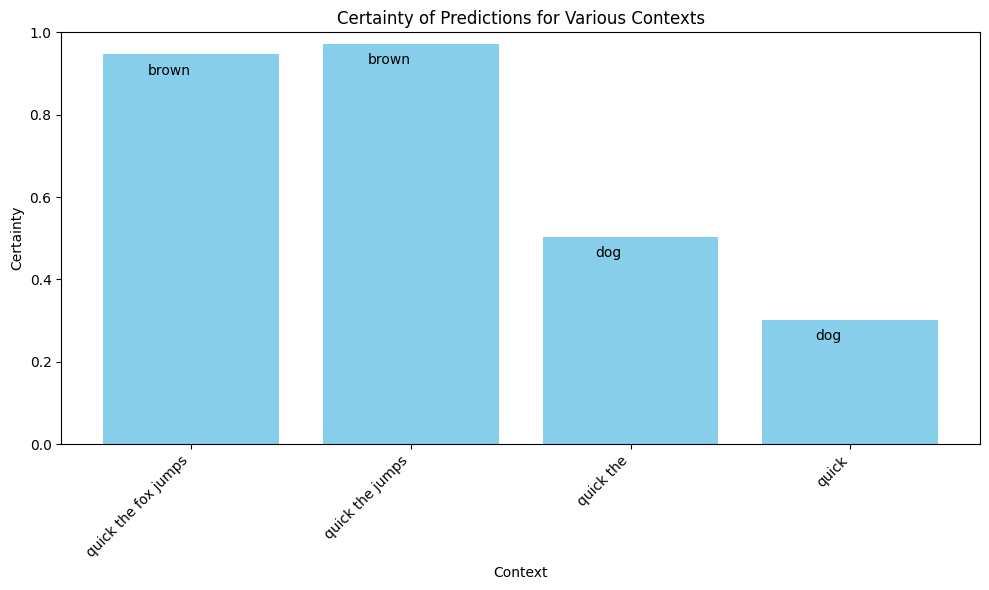

In [168]:
import matplotlib.pyplot as plt

def predict_word_with_certainty(context):
    context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
    log_probs = model(context_idxs)
    predicted_index = torch.argmax(log_probs, dim=1).item()
    ix_to_word = {index: word for word, index in word_to_ix.items()}

    # Convert log probability to probability
    prob = torch.exp(log_probs[0][predicted_index]).item()

    return ix_to_word[predicted_index], prob

def get_random_context(text, window_size=3):
    words = text.split()  # Split the text into words
    index = random.randint(0, len(words) - window_size)
    return words[index:index+window_size]

text = "The quick brown fox jumps over the lazy dog"

# Test with random context
context = get_random_context(text)
predicted_word, certainty = predict_word_with_certainty(context)
print(f"For context: {context}, predicted word is: {predicted_word} with certainty: {certainty:.4f}")

# Test with other contexts
contexts = [['quick', 'the', 'fox', 'jumps'],
            ['quick', 'the', 'jumps'],
            ['quick', 'the'],
            ['quick']]

predicted_words = []
for ctx in contexts:
    predicted_word, certainty = predict_word_with_certainty(ctx)
    predicted_words.append(predicted_word)
    print(f"For context: {ctx}, predicted word is: {predicted_word} with certainty: {certainty:.4f}")

# Collect data for visualization
context_labels = [" ".join(ctx) for ctx in contexts]
certainty_values = [predict_word_with_certainty(ctx)[1] for ctx in contexts]

# Visualize using a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(context_labels, certainty_values, color='skyblue')

# Add predicted words on top of each bar
for bar, pred_word in zip(bars, predicted_words):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,
             bar.get_height() - 0.05,
             pred_word,
             ha='center',
             color='black',
             fontsize=10)

plt.xlabel('Context')
plt.ylabel('Certainty')
plt.title('Certainty of Predictions for Various Contexts')
plt.ylim(0, 1)  # since certainty is a probability, limit y-axis to [0, 1]
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


['fox', 'dog', 'cat', 'rabbit', 'deer', 'lion', 'tiger', 'bear']
[0.1158023476600647, 0.09932219237089157, 0.11567425727844238, 0.11716129630804062, 0.11748076230287552, 0.11752082407474518, 0.11639625579118729, 0.11801764369010925]


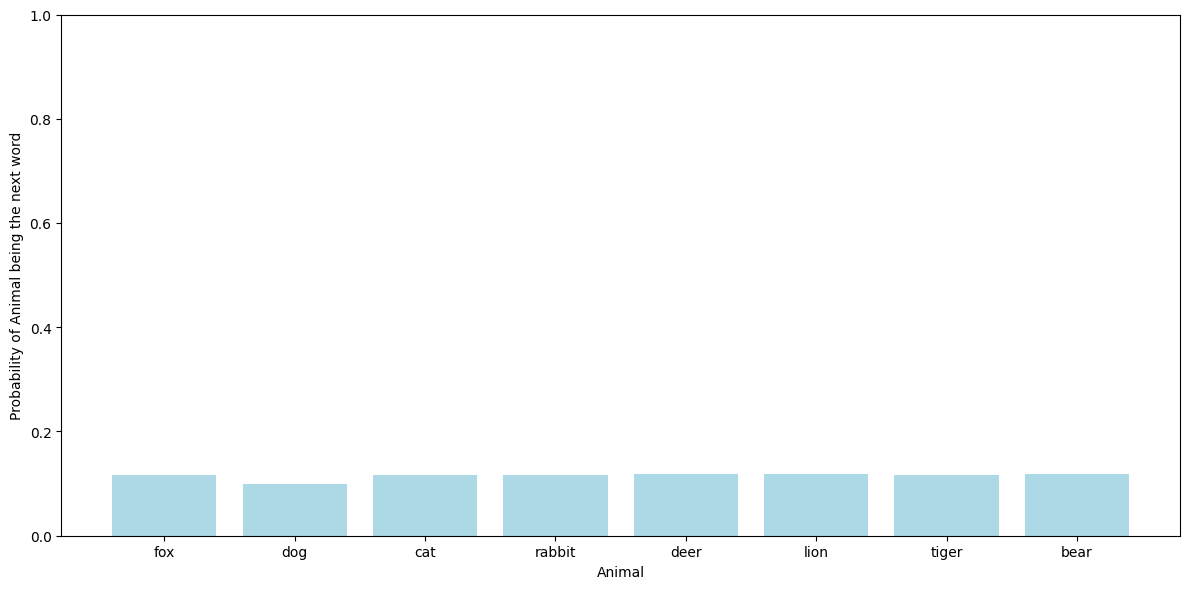

In [169]:
def get_word_probabilities(context):
    context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
    log_probs = model(context_idxs)
    probs = torch.exp(log_probs)  # Convert log probabilities to actual probabilities
    return probs[0].tolist()

# Define the context
context = ['quick', 'brown', 'jumps', 'over']

# Get probabilities for each animal being the next word after the context
animal_probs = [get_word_probabilities(context)[word_to_ix[animal]] for animal in animals]

print(animals)
print(animal_probs)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(animals, animal_probs, color='lightblue')
plt.xlabel('Animal')
plt.ylabel('Probability of Animal being the next word')

plt.ylim(0, 1)  # since it's a probability, limit y-axis to [0, 1]
plt.tight_layout()
plt.show()


In [170]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming your model has an 'embeddings' attribute that gives access to the word embeddings
embeddings = model.embeddings.weight.data.numpy()

# Use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the results
plt.figure(figsize=(15, 15))
for i, word in enumerate(vocab):  # Assuming `vocab` is the list of words in your vocabulary
    x, y = embeddings_2d[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, word, fontsize=9)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE visualization of word embeddings')
plt.show()


ValueError: ignored

Abel dies soon after, and bequeathes everything to his daughter Florentyna, except his silver band of authority, which he leaves to his grandson, whom Florentyna and Richard have named "William Abel Kane".Harry Clifton has joined the British Navy and has assumed the identity of Tom Bradshaw after his ship sinks in order to solve some of his problems, never knowing that he will end up in prison to serve Bradshaw's sentence for desertion. In prison he meets Pat Quinn, from whom he quickly starts learning prison trades. After hard work, he ends up as the prison librarian and begins writing The Diary of a Convict. Back in England, Wallace informs everyone about the death and later the burial of Harry at sea.Emma, who is Giles's sister, is Harry's girlfriend and goes to meet Maisie, Harry's Mother. While the letter by Tom Bradshaw (Harry) is lying on Maisie's mantelpiece, Emma recognizes the handwriting and believes that Harry is still alive. Not allowed to open the letter, she sets out to find Harry. She works on Kansas Star, the ship in which Harry was saved, and from there, she gets to know about the people Tom Bradshaw was with in his last moments. On visiting their home, she realize that Harry himself is Tom and is now in prison.Harry meanwhile writes a diary about his time in prison. When one of his fellow inmates, Max Lloyd, is released, he requests Harry to keep sending him diaries as he enjoys reading them a lot. Max publishes them in his own name. Emma reads the 'Diary of a Convict' and recognizes Harry's handiwork. She begins to try and meet him in prison but the warden says that Harry/Tom has been mysteriously transferred. Harry and Pat are recruited by the US army to cause mayhem behind enemy lines.Giles joins the army and is captured by Germans. He manages to escape but a fellow soldier who was his close friend is killed. He is awarded the Military Cross.Maisie marries Mr Holcombe who was Harry's teacher at Merrywood. Hugo, Harry's real father, fathers an illegitimate child and tries to attack Olga, who is the mother. Olga confronts him with the child, but he refuses to accept the child as his, and proceeds to attack her when she starts to blackmail him. Olga kills him in self-defense and later commits suicide, leaving behind the child.Emma seeks the help of her Great-aunt Phyllis in New York and her son Alistair who is a lawyer. She learns of Harry's recruitment in the army.Harry and Pat are successful in fighting behind enemy lines against the Germans, but Harry is severely injured and Pat is killed when they drive over a land mine. Harry is sent back home to England where he reunites with Emma, Giles and the whole family. The case of Harry v. Giles as to who inherits the title and inheritance as Hugo is dead is taken up by the press. Harry doesn't want the inheritance or the title, he just wants to be with Emma. The last scene in the book is of the House Of Lords adjourning as the resultant vote had been drawn; the book ends with a cliffhanger as the Lord Chancellor announces that he would present his judgment as to who will receive the Barrington fortune the next morning.A Greek man, Angelo Casefikis, enters a hospital with a gunshot wound to his leg demanding to speak to the FBI. Nick Stamos, the head of the Washington field office, tasks agents Mark Andrews and Barry Calvert to take his testimony and they learn of a plot against the life of President Florentyna Kane with the involvement of an unnamed US Senator. Stamos and Calvert are soon murdered, as is Casefikis in the hospital, leaving only Andrews alive with knowledge of the plot.Andrews reports what he knows to the FBI Director Horatio Tyson, and becomes his direct report for the 7 days until the planned assassination. Investigating a number of US Senators who could potentially have been at the lunch where Casefikis overheard the conspiracy, Andrews begins to narrow down the suspects. Alongside his investigation, he begins a romantic relationship with Elizabeth Dexter, the daughter of potential conspirator Senator Henry Dexter. As Andrews gets closer to discovering the truth, he comes to the attention of the five conspirators, who decide to murder him with a car bomb on the day of the planned assassination. Having narrowed down the suspect US Senator to two persons - Robert Harrison and Henry Dexter - Andrews escapes the attempt on his life by a coincidence when Elizabeth visits his apartment and offers him a ride. When a moment of recall reveals to Andrews that Elizabeth had lunched with her father on the day Casefikis was shot, he realises the only possible conspirator is Harrison. The plot is foiled and three of the five conspirators are captured, but not before one of them shoots Harrison with a sniper rifle.Andrews is injured in an attempt to shield Harrison from gunfire, but survives while Harrison perishes. President Kane personally congratulates him for his act of bravery, knowing nothing of the plot or of Harrison's involvement. Andrews rebuilds his intermittently frosty relationship with Elizabeth and accepts Tyson's offer of a new job.Lubji Hoch, the son of an illiterate Czech Jewish peasant, escapes the Nazis, changes his name to Richard Armstrong, and becomes a decorated British Army officer. After the war he is posted to Berlin as head of press relations in the British sector. He appropriates a floundering newspaper, his entrée to the business of publishing. On his return to the UK, he builds a publishing empire.On the other side of the world, in Australia, Keith Townsend, son of a millionaire newspaper owner, is groomed to follow in his father's footsteps. Private schools, an Oxford degree, and a position at a London newspaper prepare him to take over the family business. He quickly becomes the leading newspaper publisher in Australia.As Armstrong and Townsend battle to seize control of existing publishers on the world stage, they become fierce competitors. Hubris and overreach finally lead to financial disaster and tragic consequences.The story begins by introducing Kane and Abel's past and the feud between them. It then tells the story of Kane and Abel from the perspective of their children, Florentyna Rosnovski and Richard Kane. Their childhood, and all the incidents and people who affected them, are portrayed in a similar manner as their fathers' lives were told in Kane and Abel. There are some inconsistencies, however. For example, after Abel's divorce from Zaphia in Kane and Abel Abel gets the custody of Florentyna. But in The Prodigal Daughter, Zaphia has custody of Florentyna. Richard and Florentyna meet by sheer chance and fall in love. When their parents are told, both sets naturally react explosively; Abel goes so far as to slap the daughter he had raised with great affection. The two lovers run away that day to a friend's house in another city.Later, they two create a chain of retail stores named Florentyna's, which are a huge success. Abel helps his daughter anonymously, but refuses to accept his son-in-law. The tale takes a twist with the senior Kane's death, when Abel learns that Kane was the anonymous benefactor who helped him launch his hotel empire. He thus accepts Richard and his grandchildren and considers it an honor that his grandson is named William Abel Kane.Richard and Florentyna take charge of the Baron Hotels, with Florentyna as chairwoman, and then in a daring feat take over Lester's (Kane's bank).Eventually Florentyna takes up politics due to the persuasion of a childhood friend named Edward Winchester. Florentyna's career becomes central to the plot, as she attempts to deal with the problems a very busy and successful mother faces, including the fact that her daughter has an abortion and smokes marijuana in the mid-1970s. However, her career takes a back seat when Richard dies in a car crash in 1985. For some time, Florentyna loses the will to pursue anything, even her career. Then suddenly, seeing a homeless Vietnam Vet impels her to come "back with a vengeance." Working harder than ever, she comes very near her goal of becoming the first female U.S. President.For the good of her party, she strikes a deal with her opponent, Pete Parkin to support him if he promises not to run for a second term, and if he makes her his vice presidential candidate. During Parkin's term, Florentyna averts many a crisis: actions for which the President takes full credit. At the end of his term, however, he not only reneges on his promises and wants to run, but undermines Florentyna's support by announcing Ralph Brooks, the other Illinois Senator as his running mate. It seems as though Florentyna's dream will never become a reality. Disgusted with the entire situation, she leaves Washington. While she is playing golf and discussing what to do with her life—her son William is now President of Lester's, with Edward, Secret Service agents arrive to announce President Parkin's sudden death from a heart attack. Florentyna thus becomes the President.Cometh the Hour opens with the reading of the suicide note of Alex Fisher, MP. This note has potentially devastating consequences for Harry and Emma Clifton, Sir Giles Barrington and Lady Virginia Fennick.Sir Giles must decide whether to divulge the contents of the note to the press. If he does so it could ruin his political career. He also is considering to end this career to try to rescue a lady he met and loves (Karin) who is in East Germany and barred by that government from emigrating to England. He also must consider whether Karin loves him or whether she is a spy for the Russians.Lady Virginia, the ex-wife of Sir Giles, is facing bankruptcy because she does not know how to wisely manage her money. She seems certain to lose about everything until she is introduced to a wealthy, but gullible, man from Louisiana, Cyrus T. Grant III. Lady Virginia cooks up a scheme to force Grant to pay her a generous monthly sum for years to come.Sebastian Clifton is now the Chief Executive of Farthings Bank and because he lost his fiancée years before is now a workaholic. He falls for Priya, a beautiful Indian girl. But her parents have already chosen her future husband and she has no say in the matter. Sebastian also makes contact with his fiancé and their daughter to see whether the old relationship can be patched up. Sebastian's ruthless enemies Adrian Sloane and Desmond Mellor are still plotting to take over Farthings and will stop at nothing, legal or otherwise, to achieve their goal.Harry Clifton, now in his mid-50s, has been working to get Anatoly Babakov, who wrote an unauthorized account of Joseph Stalin, released from a gulag in Siberia and allowed to travel to New York, where his wife had lived for many years following his imprisonment.This book is full of the unexpected twists and turns characteristic of Archer's novels. At times this story is tragic and sad. Other times it is hopeful. Still other times the tale is funny, even hilarious.